<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####

import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

import numpy as np

data_url = 'https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip'
data_file = 'LoanStats_2018Q4.csv'


In [0]:
# Aproach 1
# first load the file in Colab and then load in Notebook dataframe

!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip LoanStats_2018Q4.csv.zip
!head LoanStats_2018Q4.csv
!tail LoanStats_2018Q4.csv

df = pd.read_csv(data_file)
df.shape
df.head()


In [0]:
# Aproach 2 - this approach is not good cuz it is big data and is kind of slow
# load directly in Notebook dataframe

df = pd.read_csv(data_url)
df.shape
df.head()


In [0]:
# cleaning up the first and last rows for Aproach 1

df = pd.read_csv(data_file,skiprows=1,skipfooter=2,engine='python')

In [0]:
# cleaning up the first and last rows for Aproach 2

df = pd.read_csv(data_url,skiprows=1,skipfooter=2,engine='python')

In [4]:
df.shape
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,...,23,16,24,11,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,...,4,11,17,11,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,...,2,8,9,7,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,...,5,12,14,9,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160.780000,1160.78,883.38,277.40,0.0,0.0,0.0,Sep-2019,

In [0]:
# drop the columns that are NaN in each row and save in new Dataframe

df1 = df.drop(['url','member_id','desc','id'], axis=1)

In [6]:
# clean up some of the columns : int_rate

def int_rate_to_float(int_rate_str):
  return float(int_rate_str.strip().strip('%'))

df1['int_rate'] = df['int_rate'].apply(int_rate_to_float)
df1.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,35000,35000,35000.0,36 months,14.47,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,NaN,1,Individual,NaN,...,23,16,24,11,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,5000,5000,5000.0,36 months,22.35,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,NaN,1,Individual,NaN,...,4,11,17,11,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,10000,10000,10000.0,60 months,23.40,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,2,8,9,7,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,17100,17100,17100.0,36 months,18.94,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,5,12,14,9,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4000,4000,4000.0,36 months,10.72,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3116.62,3116.62,1160

In [7]:
# clean up some of the columns : emp_title

df['emp_title'].value_counts(dropna=False)[:20]

# returns the number of unique values in emp_title column
len(df['emp_title'].value_counts())

# title() makes Title casing
# isinstance() checks the type of the passed value and returns True or False
def clean_title(title):
  if isinstance(title, str): 
    return title.strip().title()
  else: 
    return 'Unknown'

df1['emp_title'] = df['emp_title'].apply(clean_title)
df1.head()
len(df1['emp_title'].value_counts())

34902

In [8]:
# make a column 'emp_title_manager'

df1['emp_title_manager'] = df1['emp_title'].str.contains('Manager')
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,35000,35000,35000.0,36 months,14.47,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,NaN,1,Individual,NaN,...,16,24,11,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,5000,5000,5000.0,36 months,22.35,191.86,D,D5,Director Of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,NaN,1,Individual,NaN,...,11,17,11,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,10000,10000,10000.0,60 months,23.40,284.21,E,E1,Unknown,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,8,9,7,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
3,17100,17100,17100.0,36 months,18.94,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,12,14,9,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4000,4000,4000.0,36 months,10.72,130.43,B,B2,Extrusion Assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6

In [0]:
# filter the dataframe on that new column

condition = (df1['emp_title_manager'] == True)
managers = df1[condition]
non_managers = df1[-condition]

In [0]:
df1['issue_d'] = pd.to_datetime(df['issue_d'],infer_datetime_format=True)
df1['issue_d_year'] = df1['issue_d'].dt.year

In [113]:
summary = df1['emp_title'].value_counts()
summary[:10]

Unknown             20947
Teacher              2557
Manager              2395
Registered Nurse     1418
Driver               1258
Supervisor           1160
Truck Driver          920
Rn                    834
Office Manager        805
Sales                 803
Name: emp_title, dtype: int64

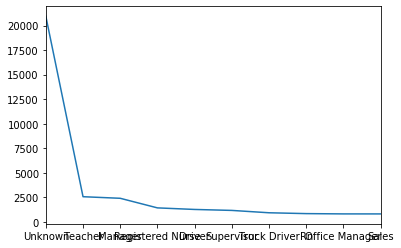

In [33]:
summary[:10].plot();

In [0]:
# Bellow is the new work 

In [76]:
# Convert the 'term' column from string to integer.
def term_strip(astr):
  return int(astr.strip('months').strip())

df1['term_int'] = df['term'].apply(term_strip)
df1['term_int']

0         36
1         36
2         60
3         36
4         36
          ..
128407    36
128408    36
128409    36
128410    36
128411    36
Name: term_int, Length: 128412, dtype: int64

In [43]:
df1['loan_status'].isnull().sum()

0

In [46]:
# make a column 'loan_status_is_great'

# 
def loan_status_is_great(loan_status):
  if (loan_status == 'Current') | (loan_status == 'Fully Paid'):
    return 1
  else:
    return 0

df1['loan_status_is_great'] = df1['loan_status'].apply(loan_status_is_great) 
df1.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_d_year,loan_status_is_great,term_int
0,35000,35000,35000.0,36 months,14.47,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,2018-12-01,Fully Paid,n,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,35000.00,3187.05,0.0,0.0,0.0,Aug-2019,29882.16,NaN,Sep-2019,0,NaN,1,Individual,NaN,...,24,0.0,0,0,5,100.0,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,1,36
1,5000,5000,5000.0,36 months,22.35,191.86,D,D5,Director Of Sales,10+ years,MORTGAGE,72000.0,Source Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,5000.00,615.98,0.0,0.0,0.0,Jul-2019,4474.13,NaN,Aug-2019,0,NaN,1,Individual,NaN,...,13,0.0,0,0,1,100.0,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,1,36
2,10000,10000,10000.0,60 months,23.40,284.21,E,E1,Unknown,< 1 year,RENT,55000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9131.55,9131.55,2538.390000,2538.39,868.45,1669.94,0.0,0.0,0.0,Sep-2019,284.21,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,9,0.0,0,0,0,90.9,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,1,60
3,17100,17100,17100.0,36 months,18.94,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13682.21,13682.21,5609.710000,5609.71,3417.79,2191.92,0.0,0.0,0.0,Sep-2019,626.30,Oct-2019,Oct-2019,0,NaN,1,Individual,NaN,...,14,NaN,0,0,2,95.0,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,1,36
4,4000,4000,4000.0,36 months,10.72,130.43,B,B2,Extrusion Assistant,10+ years,MORTGAGE,56000.0,Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,

In [0]:
df1.tail(10)

In [48]:
df1['last_pymnt_d'].isnull().sum()

159

In [49]:
# first have to convert 'last pymnt_d' column to datetime
# there are values in the column that are NaN, but seems the pandas function to_datetime() handles that
# it converts NaN to NaT which is similar to NaN but stored in datetime columns

df1['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],infer_datetime_format=True)

df1['last_pymnt_d'].isnull().sum()



159

In [0]:
# preserving the orig column for other uses
df1['last_pymnt_d_orig'] = df['last_pymnt_d']


In [0]:
# other aproach to convert 'last pymnt_d' column to datetime
def make_date_from_datestr(date_str):
  if isinstance(date_str, str): 
    return pd.to_datetime(date_str, infer_datetime_format=True)
  else:
    return pd.NaT
#make_date_from_datestr('Oct-2018')
df1['last_pymnt_d_v2'] = df['last_pymnt_d'].apply(make_date_from_datestr)

In [0]:
# if you want to display only subset of columns 
# df1[['last_pymnt_d','last_pymnt_d_v2']].head(100)

# df1[df1['last_pymnt_d'].isnull()]


In [0]:
# make the year, month columns from already converted date column
df1['last_pymnt_d_month'] = df1['last_pymnt_d'].dt.month 
df1['last_pymnt_d_year'] = df1['last_pymnt_d'].dt.year

# make the year, month columns directly from the string date column
df1['last_pymnt_d_month_v2'] = pd.to_datetime(df['last_pymnt_d'],infer_datetime_format=True).dt.month 
df1['last_pymnt_d_year_v2'] = pd.to_datetime(df['last_pymnt_d'],infer_datetime_format=True).dt.year

In [53]:
last_paym_date_null = df1['last_pymnt_d'].isnull()
no_payment_date =df1[last_paym_date_null]

no_payment_date.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_d_year,loan_status_is_great,term_int,last_pymnt_d_orig,last_pymnt_d_v2,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_d_month_v2,last_pymnt_d_year_v2
1588,20975,20975,20975.0,36 months,8.19,659.13,A,A4,Project Director,2 years,MORTGAGE,165000.0,Verified,2018-12-01,Charged Off,n,debt_consolidation,Debt consolidation,194xx,PA,24.27,0,Oct-1997,0,NaN,NaN,9,0,4210,16.6%,21,w,0.0,0.0,2864.00,2864.00,0.0,0.0,0.0,2864.00,515.5200,NaT,0.0,NaN,Oct-2019,0,NaN,1,Individual,NaN,...,0.0,0,0,378104,111136,7500,85932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,0,36,NaN,NaT,NaN,NaN,NaN,NaN
2929,14000,14000,14000.0,36 months,8.19,439.94,A,A4,Driver,1 year,RENT,36000.0,Not Verified,2018-12-01,Charged Off,n,debt_consolidation,Debt consolidation,982xx,WA,25.83,0,Dec-1998,0,33.0,NaN,6,0,13537,73.6%,11,f,0.0,0.0,1910.17,1910.17,0.0,0.0,0.0,1910.17,343.8306,NaT,0.0,NaN,Jun-2019,0,33.0,1,Individual,NaN,...,33.3,0,0,35298,16221,16700,16898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,0,36,NaN,NaT,NaN,NaN,NaN,NaN
3225,20000,20000,20000.0,36 months,11.80,662.38,B,B4,Dental Hygienist,3 years,RENT,50000.0,Verified,2018-12-01,Charged Off,n,vacation,Vacation,276xx,NC,9.18,0,Aug-2003,1,NaN,NaN,17,0,16576,13.9%,26,w,0.0,0.0,2768.67,2768.67,0.0,0.0,0.0,2768.67,498.3606,NaT,0.0,NaN,Jun-2019,0,NaN,1,Individual,NaN,...,0.0,0,0,164900,65731,91200,45500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,0,36,NaN,NaT,NaN,NaN,NaN,NaN
3285,32000,32000,32000.0,36 months,11.80,1059.81,B,B4,Estimator,< 1 year,RENT,50000.0,Source Verified,2018-12-01,Charged Off,n,debt_consolidation,Debt consolidation,070xx,NJ,6.10,0,Aug-2009,0,36.0,NaN,3,0,2111,50.3%,28,w,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,NaN,Oct-2019,0,36.0,1,Individual,NaN,...,0.0,0,0,33529,32405,500,29329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,0,36,NaN,NaT,NaN,NaN,NaN,NaN
3440,9100,9100,9100.0,36 months,26.31,368.15,E,E4,Rural Carrier,3 years,OWN,62000.0,Verified,2018-12-01,Charged Off,n,other,Other,465xx,IN,13.38,0,Nov-2003,1,41.0,NaN,8,0,4165,12.1%,23,w,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,NaN,Oct-2019,0,NaN,1,Individu

In [0]:
# cleanup the % column and convert to float
def cleanup_perc(perc_str):
  if isinstance(perc_str, str):
    return float(perc_str.strip().strip('%'))
  else:
    return np.NaN
cleanup_perc(np.NaN)    

df1['revol_util'] = df['revol_util'].apply(cleanup_perc)

In [129]:
# create a subset of the Dataframe that contains only the top 20 records that meet the condition
cond2 = (df1['grade']=='C') & (df1['term_int']==36)
# this bellow returns a subset that meets the condition and is only 1 column 
subdf=df1[cond2].sort_values('term_int')['emp_title']
subdf
# the next returns a subset that meets the condition and also limits to the first 20 records (but that is not equivalent to the top 20 titles), and also returns all the columns
subdf = df1[cond2].head(20)
subdf['emp_title']


0                Staff Physician
10                        Server
23                     Carpenter
26                       Unknown
33              Shift Supervisor
40         Sales Account Manager
47                    Bus Driver
49                       Unknown
50                       Unknown
54        Operations Coordinator
60                     Conductor
66              Training Manager
76          Direct Care Provider
79                       Unknown
83                       Unknown
88             Fuel Truck Driver
91       Plant Logistics Manager
106    Senior Area Sales Manager
109                       Banker
111            Exhibits Director
Name: emp_title, dtype: object

In [131]:
# first need to create a subset of the Dataframe that contains the Top 20 titles (the titles that are present the most in the full Dataframe)
# to do so, we can use the value_counts() function applied on the titles column to get info about how many times each title is found in that column
# and if we limit the result set to first 20 records (the result is by default sorted Descending), we can get the Top 20 titles 
subdf1 = df1['emp_title'].value_counts()
subdf1_top20 = subdf1.head(20)
subdf1_top20
# 'Teacher' in subdf1_top20.index

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [133]:
# check if an emp_title is in the top 20 titles
# must pay attention that the Title is not in the 'emp_title' column of the subdf1 but in the Index of it.
df1['emp_title_is_top20'] = df1['emp_title'].isin(subdf1_top20.index) 
df1['emp_title_is_top20']

0         False
1         False
2          True
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410     True
128411    False
Name: emp_title_is_top20, Length: 128412, dtype: bool

In [140]:
# add a modified column 'emp_title_top20' which has Other for every title that is not in top 20 titles
cond3 = np.where(df1['emp_title'].isin(subdf1_top20.index), df1['emp_title'], 'Other')
df1['emp_title_top20'] = cond3
df1_top20 = df1[df1['emp_title_top20'] != 'Other']

df1_top20['emp_title']


2                 Unknown
5                 Teacher
6              Supervisor
9         Project Manager
19                Unknown
               ...       
128401            Unknown
128402            Unknown
128404              Owner
128406            Unknown
128410            Unknown
Name: emp_title, Length: 38471, dtype: object

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01